In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [36]:
MBTI = pd.read_csv('MBTI 500.csv')
MBTI.head()

,posts,type
0,know intj tool use interaction people excuse a...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably p hd low except wew lad video p min...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ


In [37]:
#Inspection and Cleaning

In [38]:
MBTI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106067 entries, 0 to 106066
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   posts   106067 non-null  object
 1   type    106067 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


In [39]:
MBTI = MBTI.rename(columns={'type':'Personality Type'})

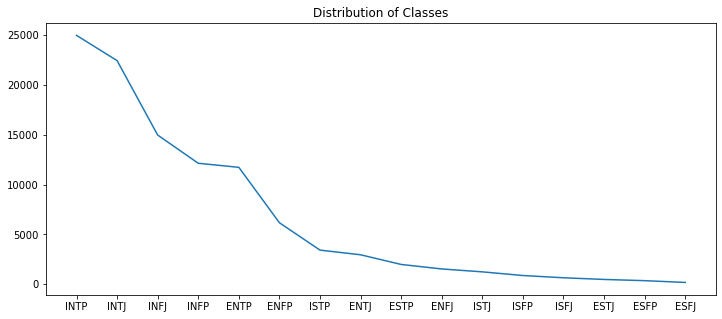

In [40]:
plt.figure(figsize=(12,5))
plt.plot(MBTI['Personality Type'].value_counts())
plt.title('Distribution of Classes')
plt.show()

In [41]:
#Some amount of class imbalance found. 

In [42]:
MBTI['Length'] = MBTI['posts'].apply(lambda x: len(x.split(' ')))
MBTI['Length'].describe()

count    106067.000000
mean        500.019818
std           1.209997
min         479.000000
25%         500.000000
50%         500.000000
75%         500.000000
max         527.000000
Name: Length, dtype: float64

In [43]:
#As we can see the length of the sentences are not exactly 500 each. 

In [44]:
#We will now get a list of all the words in all the posts. 
#We will take a sample of the data since there are a lot of words present. 

In [45]:
MBTI_Pred = MBTI.sample(frac=0.1)
len(MBTI_Pred)

10607

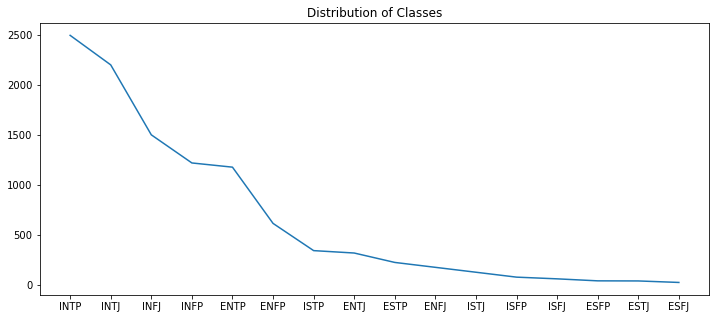

In [46]:
plt.figure(figsize=(12,5))
plt.plot(MBTI_Pred['Personality Type'].value_counts())
plt.title('Distribution of Classes')
plt.show()

In [47]:
Words = list()
for i in list(MBTI_Pred['posts']):
    for j in i.split(' '):
        Words.append(j)

In [48]:
from collections import Counter

In [49]:
Words_dic = Counter(Words)
Words_dic = pd.DataFrame({'Word':list(Words_dic.keys()),'Frequency':list(Words_dic.values())})
Words_dic.sort_values('Frequency',ascending=False,inplace=True)
Words_dic.set_index('Word',inplace=True)
print(len(Words_dic))
Words_dic.head()

72078


,Frequency
Word,
like,69902
think,59780
people,55810
get,53080
thing,40810


In [50]:
#Checking distribution of word frequencies

In [51]:
Words_dic['Frequency'].describe()

count    72078.000000
mean        73.584298
std        863.832969
min          1.000000
25%          1.000000
50%          1.000000
75%          6.000000
max      69902.000000
Name: Frequency, dtype: float64

In [52]:
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    print(Words_dic['Frequency'].quantile(i))

1.0
1.0
1.0
1.0
1.0
2.0
4.0
10.0
39.0


In [53]:
for i in [0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]:
    print(Words_dic['Frequency'].quantile(i))

47.0
58.0
73.0
95.0
131.0
191.0
289.0
531.4599999999919
1350.229999999996


In [54]:
#Using the top 1 quantile of words based on frequency. 

In [55]:
Words_dic = Words_dic[Words_dic.Frequency>1341.6500000000087]
len(Words_dic)

724

In [56]:
#We will now apply these words to the entire dataset based on their presence in the posts. 

In [57]:
Final_Words = list(Words_dic.index)
for i in Final_Words:
    MBTI[i] = MBTI['posts'].apply(lambda x: 1 if i in x.split(' ') else 0)
MBTI.drop(['Length','posts'],axis=1,inplace=True)
MBTI.head()

,Personality Type,like,think,people,get,thing,make,know,feel,one,...,finally,estj,obvious,role,aspect,highly,context,discus,j,activity
0,INTJ,1,1,1,1,1,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0
1,INTJ,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,1
2,INTJ,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,1,0,0,0,0
3,INTJ,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,INTJ,1,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [58]:
len(MBTI)

106067

In [59]:
#EDA 

In [60]:
#We will check which top 10 words for each of the different personality types. 

In [61]:
MBTI_EDA = MBTI.groupby('Personality Type').mean()
MBTI_EDA = MBTI_EDA.transpose()
MBTI_EDA.head()

Personality Type,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
like,0.994785,0.998054,0.988494,0.996077,1.000000,0.994444,0.981328,0.986908,0.996391,0.998187,0.992286,0.994832,1.000000,0.998857,0.995173,0.994743
think,0.991525,0.991406,0.983756,0.993006,0.994475,0.994444,0.987552,0.965760,0.992649,0.991759,0.986445,0.991827,0.998462,0.998857,0.983910,0.987442
people,0.981095,0.982001,0.974958,0.982260,0.977901,0.986111,0.962656,0.966264,0.981354,0.979974,0.980604,0.977685,0.986154,0.980571,0.964602,0.979848
get,0.977836,0.992217,0.985110,0.986695,0.988950,0.986111,0.941909,0.975327,0.988171,0.985495,0.983993,0.983094,0.978462,0.980571,0.990346,0.989486
thing,0.966754,0.969677,0.930964,0.961365,0.961326,0.961111,0.846473,0.864048,0.965582,0.966870,0.961653,0.962782,0.966154,0.974857,0.955752,0.959696


In [62]:
len(MBTI_EDA)

724

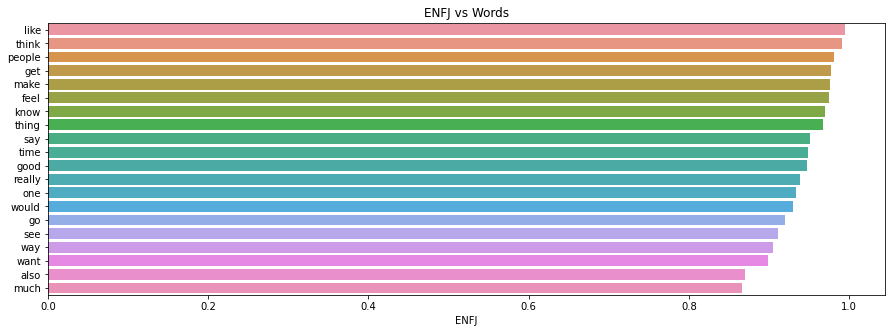

In [29]:
MBTI_EDA_ENFJ = MBTI_EDA[['ENFJ']]
MBTI_EDA_ENFJ.sort_values('ENFJ',ascending=False,inplace=True)
MBTI_EDA_ENFJ = MBTI_EDA_ENFJ.head(20)
plt.figure(figsize=(15,5))
sns.barplot(x=MBTI_EDA_ENFJ.ENFJ,y=MBTI_EDA_ENFJ.index)
plt.title('ENFJ vs Words')
plt.show()

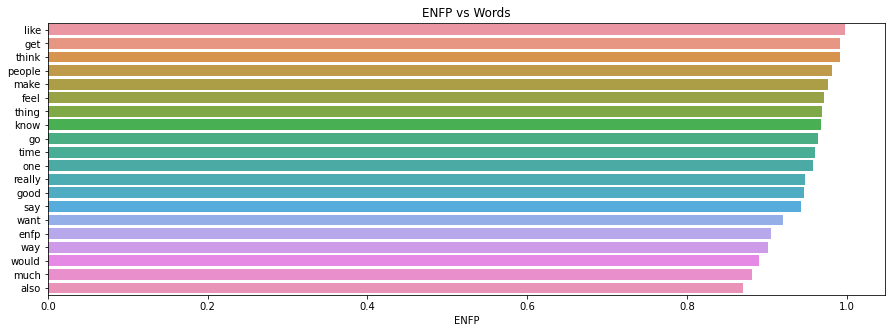

In [30]:
MBTI_EDA_ENFP = MBTI_EDA[['ENFP']]
MBTI_EDA_ENFP.sort_values('ENFP',ascending=False,inplace=True)
MBTI_EDA_ENFP = MBTI_EDA_ENFP.head(20)
plt.figure(figsize=(15,5))
sns.barplot(x=MBTI_EDA_ENFP.ENFP,y=MBTI_EDA_ENFP.index)
plt.title('ENFP vs Words')
plt.show()

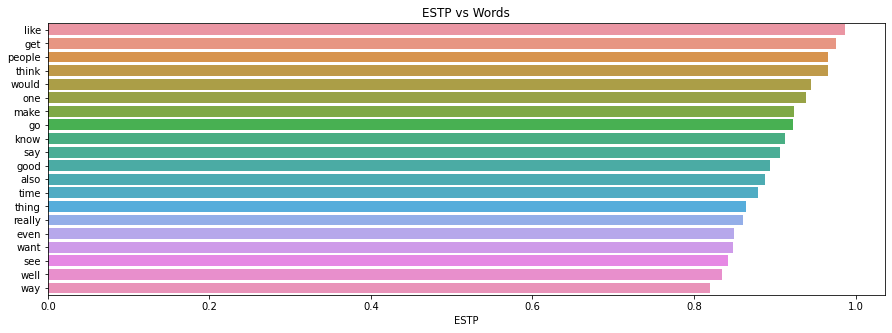

In [31]:
MBTI_EDA_ESTP = MBTI_EDA[['ESTP']]
MBTI_EDA_ESTP.sort_values('ESTP',ascending=False,inplace=True)
MBTI_EDA_ESTP = MBTI_EDA_ESTP.head(20)
plt.figure(figsize=(15,5))
sns.barplot(x=MBTI_EDA_ESTP.ESTP,y=MBTI_EDA_ESTP.index)
plt.title('ESTP vs Words')
plt.show()

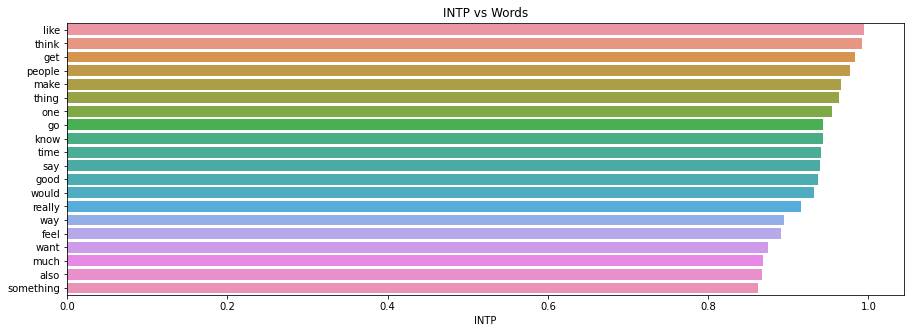

In [32]:
MBTI_EDA_INTP = MBTI_EDA[['INTP']]
MBTI_EDA_INTP.sort_values('INTP',ascending=False,inplace=True)
MBTI_EDA_INTP = MBTI_EDA_INTP.head(20)
plt.figure(figsize=(15,5))
sns.barplot(x=MBTI_EDA_INTP.INTP,y=MBTI_EDA_INTP.index)
plt.title('INTP vs Words')
plt.show()

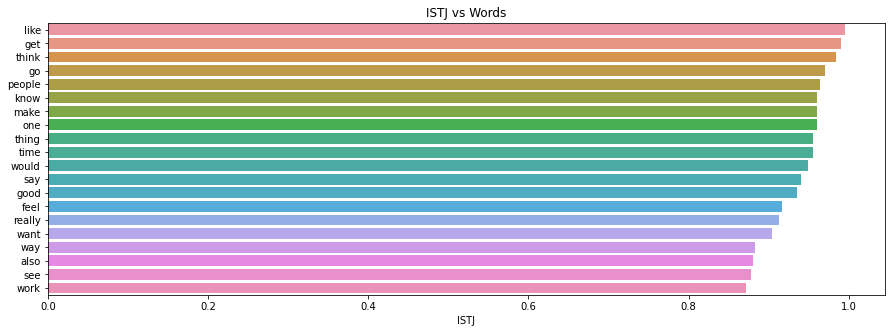

In [33]:
MBTI_EDA_ISTJ = MBTI_EDA[['ISTJ']]
MBTI_EDA_ISTJ.sort_values('ISTJ',ascending=False,inplace=True)
MBTI_EDA_ISTJ = MBTI_EDA_ISTJ.head(20)
plt.figure(figsize=(15,5))
sns.barplot(x=MBTI_EDA_ISTJ.ISTJ,y=MBTI_EDA_ISTJ.index)
plt.title('ISTJ vs Words')
plt.show()

In [34]:
#We get a chart of the most probable words being used in the posts of some of the personality types. 

In [35]:
#Model building 

In [36]:
#Now we will build a model to predict each personality type from the words used. 

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score

In [38]:
Personalities = ['INFP','INFJ','INTP','INTJ','ENTP','ENFP','ISTP','ISFP','ENTJ','ISTJ','ENFJ','ISFJ','ESTP','ESFP','ESFJ','ESTJ']
Feature_Importance = pd.DataFrame()

In [39]:
#Taking only a small sample of the data for training since we have a lot of data. 

In [40]:
MBTI =  MBTI.sample(frac=0.05)

In [41]:
for i in Personalities:
    Temp = MBTI.copy()
    Temp['Personality Type'] = Temp['Personality Type'].apply(lambda x: 1 if x==i else 0)
    X = Temp.drop('Personality Type',axis=1)
    y = Temp['Personality Type']
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=100)
    
    Model = RandomForestClassifier(n_jobs=-1,random_state=100,class_weight='balanced')
    
    params = {'n_estimators':[100],
              'max_depth':[3,5,7,10,12,15],
              'max_features':[0.05,0.1,0.15,0.2],
              'criterion':["gini","entropy"]}
    
    grid_search = GridSearchCV(estimator=Model,param_grid=params,verbose=1,n_jobs=-1,scoring='accuracy')
    grid_search.fit(X_train,y_train)
    
    Model_best = grid_search.best_estimator_
    
    y_train_pred = Model_best.predict(X_train)
    y_test_pred = Model_best.predict(X_test)
    
    print(i)
    print('Train Accuracy :',accuracy_score(y_train,y_train_pred))
    print('Test Accuracy :',accuracy_score(y_test,y_test_pred))

    
    Feature_Importance['Feature'] = X_train.columns
    Feature_Importance[i] = Model_best.feature_importances_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
INFP
Train Accuracy : 0.978448275862069
Test Accuracy : 0.9277184160905091
Fitting 5 folds for each of 48 candidates, totalling 240 fits
INFJ
Train Accuracy : 0.9954202586206896
Test Accuracy : 0.9044626021370208
Fitting 5 folds for each of 48 candidates, totalling 240 fits
INTP
Train Accuracy : 0.9480064655172413
Test Accuracy : 0.8724072910119421
Fitting 5 folds for each of 48 candidates, totalling 240 fits
INTJ
Train Accuracy : 0.9520474137931034
Test Accuracy : 0.8642363293526084
Fitting 5 folds for each of 48 candidates, totalling 240 fits
ENTP
Train Accuracy : 0.9876077586206896
Test Accuracy : 0.8988057825267127
Fitting 5 folds for each of 48 candidates, totalling 240 fits
ENFP
Train Accuracy : 0.9881465517241379
Test Accuracy : 0.9421747328724073
Fitting 5 folds for each of 48 candidates, totalling 240 fits
ISTP
Train Accuracy : 0.9924568965517241
Test Accuracy : 0.9666876178504086
Fitting 5 folds for each of 48 cand

In [42]:
Feature_Importance.head()

,Feature,INFP,INFJ,INTP,INTJ,ENTP,ENFP,ISTP,ISFP,ENTJ,ISTJ,ENFJ,ISFJ,ESTP,ESFP,ESFJ,ESTJ
0,like,0.000000,0.000467,0.000147,0.000070,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000
1,think,0.000442,0.000242,0.000188,0.000506,0.000100,0.000000,2.196447e-04,0.0,0.000000,0.000000e+00,1.322267e-03,0.0,0.000000e+00,5.856076e-16,0.0,0.000000
2,people,0.000185,0.000278,0.000367,0.000070,0.000181,0.000388,2.150929e-04,0.0,0.000183,0.000000e+00,1.183870e-17,0.0,1.407902e-19,0.000000e+00,0.0,0.000000
3,get,0.001010,0.000596,0.000143,0.000288,0.000100,0.001177,4.481223e-05,0.0,0.000916,0.000000e+00,5.861194e-18,0.0,5.791515e-04,0.000000e+00,0.0,0.000000
4,thing,0.000340,0.000472,0.000629,0.000388,0.000606,0.000510,1.312202e-17,0.0,0.001303,4.602413e-17,9.906348e-04,0.0,8.339608e-04,0.000000e+00,0.0,0.001322


In [43]:
#As we can see most of the models have pretty good accuracy scores on both the test and train sets. 

In [44]:
# END FOR NOW #